In [2]:
# ! wget http://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt

In [3]:
import pandas as pd
import os
import itertools
import seaborn as sns

import matplotlib.pyplot as plt

SYMBOL_SEPARATOR = '---'

In [4]:
human_mouse_homologs = pd.read_csv('HOM_MouseHumanSequence.rpt', sep='\t')
print(human_mouse_homologs.shape)
human_mouse_homologs.head()

(43117, 13)


,DB Class Key,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: , human: )",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
0,39806032,"mouse, laboratory",10090,Gdnf,14573,MGI:107430,NaN,NaN,Chr15 3.8 cM,Chr15:7840327-7867056(+),"NM_010275,NM_001301333,NM_001301357,NM_001301332","NP_001288262,NP_034405,NP_001288286,NP_001288261",P48540
1,39806032,human,9606,GDNF,2668,NaN,HGNC:4232,OMIM:600837,Chr5 p13.2,Chr5:37812677-37840044(-),"NM_199231,NM_001278098,NM_001190469,NM_000514,...","NP_001177398,NP_000505,NP_001177397,XP_0168648...",P39905
2,39806033,"mouse, laboratory",10090,Npy4r,19065,MGI:105374,NaN,NaN,Chr14 20.8 cM,Chr14:33867603-33874376(-),NM_008919,NP_032945,Q61041
3,39806033,human,9606,NPY4R,5540,NaN,HGNC:9329,OMIM:601790,Chr10 q11.22,Chr10:46458551-46470668(-),"NM_001278794,NM_005972","NP_005963,XP_011538238,XP_011538239,XP_0168718...",NaN
4,39806034,"mouse, laboratory",10090,Evx2,14029,MGI:95462,NaN,NaN,Chr2 44.13 cM,Chr2:74483335-74489901(-),"XM_006498728,XM_006498729,NM_007967","XP_006498792,NP_031993,XP_006498791",P49749


In [5]:
gather_results_dir = '/Users/olgabot/botryllus/pipeline-results/kmermaid/april2021-singleton-fewer-species/gather_results__may2021/'

In [6]:
mouse_gather_results = pd.read_parquet(os.path.join(gather_results_dir, 'Mus_musculus.GRCm39.pep.all.chr17.fa__gather__human-chr6__moltype-hp__ksize-72.parquet'))
print(mouse_gather_results.shape)
mouse_gather_results.head()

(6010, 15)


,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000341097.4pep chromosome:GRCh38:6:51720...,762fd37707aae75233b97191bc015af5,0.003086,hp,72
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358487.4pep chromosome:GRCh38:6:88612...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000365998.2pep chromosome:GRCh38:6:29942...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72


In [7]:
mouse_gather_results['mouse_gene_symbol'] = mouse_gather_results.query_name.str.extract('gene_symbol:([\w\d\-]+)')
mouse_gather_results['human_gene_symbol'] = mouse_gather_results.name.str.extract('gene_symbol:([\w\d\-]+)')
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000341097.4pep chromosome:GRCh38:6:51720...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358487.4pep chromosome:GRCh38:6:88612...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000365998.2pep chromosome:GRCh38:6:29942...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A


In [8]:
human_mouse_homologs["DB Class Key"].nunique()

20598

In [9]:
human_mouse_homologs["DB Class Key"].nunique()

20598

In [10]:
human_mouse_homologs.head()

,DB Class Key,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: , human: )",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
0,39806032,"mouse, laboratory",10090,Gdnf,14573,MGI:107430,NaN,NaN,Chr15 3.8 cM,Chr15:7840327-7867056(+),"NM_010275,NM_001301333,NM_001301357,NM_001301332","NP_001288262,NP_034405,NP_001288286,NP_001288261",P48540
1,39806032,human,9606,GDNF,2668,NaN,HGNC:4232,OMIM:600837,Chr5 p13.2,Chr5:37812677-37840044(-),"NM_199231,NM_001278098,NM_001190469,NM_000514,...","NP_001177398,NP_000505,NP_001177397,XP_0168648...",P39905
2,39806033,"mouse, laboratory",10090,Npy4r,19065,MGI:105374,NaN,NaN,Chr14 20.8 cM,Chr14:33867603-33874376(-),NM_008919,NP_032945,Q61041
3,39806033,human,9606,NPY4R,5540,NaN,HGNC:9329,OMIM:601790,Chr10 q11.22,Chr10:46458551-46470668(-),"NM_001278794,NM_005972","NP_005963,XP_011538238,XP_011538239,XP_0168718...",NaN
4,39806034,"mouse, laboratory",10090,Evx2,14029,MGI:95462,NaN,NaN,Chr2 44.13 cM,Chr2:74483335-74489901(-),"XM_006498728,XM_006498729,NM_007967","XP_006498792,NP_031993,XP_006498791",P49749


In [11]:
lines = []

# def get_human_mouse_symbol_product(df):
for class_key, df in human_mouse_homologs.groupby('DB Class Key'):
    organism = df["Common Organism Name"]
    mouse_symbols = df.loc[organism == "mouse, laboratory", "Symbol"].tolist()
    human_symbols = df.loc[organism == "human", "Symbol"].tolist()
    lines.extend(itertools.product(mouse_symbols, human_symbols))
    # break
# lines = human_mouse_homologs.groupby('DB Class Key').apply(get_human_mouse_symbol_product)
human_mouse_pairs = pd.DataFrame(lines)
human_mouse_pairs.head()

,0,1
0,Gdnf,GDNF
1,Npy4r,NPY4R
2,Evx2,EVX2
3,Tbx4,TBX4
4,Pycard,PYCARD


In [36]:
print(human_mouse_pairs.shape)

(22520, 3)


In [39]:
human_mouse_pairs.head()

,mouse,human,pair
0,Gdnf,GDNF,Gdnf---GDNF
1,Npy4r,NPY4R,Npy4r---NPY4R
2,Evx2,EVX2,Evx2---EVX2
3,Tbx4,TBX4,Tbx4---TBX4
4,Pycard,PYCARD,Pycard---PYCARD


In [42]:
human_mouse_pairs_in_gather_results = human_mouse_pairs.query(
    "(mouse in @mouse_gather_results.mouse_gene_symbol)"
    "or (human in @mouse_gather_results.human_gene_symbol)"
)
human_mouse_pairs_in_gather_results.shape

(1320, 3)

In [12]:
human_mouse_pairs.shape

(22520, 2)

In [13]:
human_mouse_pairs.tail()

,0,1
22515,Zscan4b,ZSCAN4
22516,Zscan5b,ZSCAN5A
22517,Zscan5b,ZSCAN5B
22518,Zscan5b,ZSCAN5C
22519,Zscan5b,ZSCAN5DP


In [14]:
human_mouse_pairs = human_mouse_pairs.rename(columns={0:'mouse', 1:'human'})
human_mouse_pairs.head()

,mouse,human
0,Gdnf,GDNF
1,Npy4r,NPY4R
2,Evx2,EVX2
3,Tbx4,TBX4
4,Pycard,PYCARD


In [15]:
human_mouse_pairs['pair'] = human_mouse_pairs['mouse'] + SYMBOL_SEPARATOR + human_mouse_pairs['human']
human_mouse_pairs.head()

,mouse,human,pair
0,Gdnf,GDNF,Gdnf---GDNF
1,Npy4r,NPY4R,Npy4r---NPY4R
2,Evx2,EVX2,Evx2---EVX2
3,Tbx4,TBX4,Tbx4---TBX4
4,Pycard,PYCARD,Pycard---PYCARD


In [16]:
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000341097.4pep chromosome:GRCh38:6:51720...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358487.4pep chromosome:GRCh38:6:88612...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000365998.2pep chromosome:GRCh38:6:29942...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A


In [17]:
mouse_gather_results['pair'] = mouse_gather_results['mouse_gene_symbol'] + SYMBOL_SEPARATOR + mouse_gather_results['human_gene_symbol']
mouse_gather_results.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair
0,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.003086,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000341097.4pep chromosome:GRCh38:6:51720...,762fd37707aae75233b97191bc015af5,0.003086,hp,72,Casp16,PKHD1,Casp16---PKHD1
1,ENSMUSP00000138283.4pep chromosome:GRCm39:17:2...,10.0,0.016667,0.016667,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358487.4pep chromosome:GRCh38:6:88612...,333384202ce1abf3cf012d0cc6412521,0.016667,hp,72,Casp16,RNGTT,Casp16---RNGTT
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,H2-Ea---HLA-DRA
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,H2-Ea---HLA-DRA
0,ENSMUSP00000139605.2pep chromosome:GRCm39:17:3...,10.0,0.037037,0.035714,0.037037,0.037037,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000365998.2pep chromosome:GRCh38:6:29942...,0ea8bf75302811e487f8613aa4735bb6,0.035714,hp,72,H2-Q5,HLA-A,H2-Q5---HLA-A


In [18]:
mouse_gather_results.shape

(6010, 18)

In [19]:
rows = mouse_gather_results.pair.isin(human_mouse_pairs.pair)
mouse_gather_results_known = mouse_gather_results.loc[rows]
mouse_gather_results_known.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair
0,ENSMUSP00000158275.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,H2-Ea---HLA-DRA
0,ENSMUSP00000157668.2pep chromosome:GRCm39:17:3...,40.0,0.250000,0.148148,0.250000,0.250000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364121.5pep chromosome:GRCh38:6:32439...,4af15e8f47e4d79d247b08141ffd9db9,0.148148,hp,72,H2-Ea,HLA-DRA,H2-Ea---HLA-DRA
0,ENSMUSP00000076024.7pep chromosome:GRCm39:17:3...,570.0,0.435115,0.401408,0.435115,0.435115,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000356146.3pep chromosome:GRCh38:6:15473...,b69f023e87dc00d14b118b43dcf0e995,0.401408,hp,72,Scaf8,SCAF8,Scaf8---SCAF8
0,ENSMUSP00000156084.2pep chromosome:GRCm39:17:3...,70.0,1.000000,0.049296,1.000000,1.000000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000356146.3pep chromosome:GRCh38:6:15473...,b69f023e87dc00d14b118b43dcf0e995,0.049296,hp,72,Scaf8,SCAF8,Scaf8---SCAF8
0,ENSMUSP00000125842.2pep chromosome:GRCm39:17:3...,670.0,0.372222,0.376404,0.372222,0.372222,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000353528.4pep chromosome:GRCh38:6:15512...,ab1394e1c7533db39439a72083e3c7dd,0.376404,hp,72,Tiam2,TIAM2,Tiam2---TIAM2


In [20]:
mouse_gather_results_known.shape

(1317, 18)

In [21]:
mouse_gather_results['known_homolog'] = rows
mouse_gather_results.groupby('known_homolog').intersect_bp.median()

known_homolog
False     10.0
True     110.0
Name: intersect_bp, dtype: float64

In [22]:
mouse_gather_results.query('intersect_bp > 10').known_homolog.value_counts()

True     1215
False     799
Name: known_homolog, dtype: int64

In [79]:
print(mouse_gather_results.sort_values('intersect_bp', ascending=False).head(20).to_markdown())

|    | query_name                                                                                                                                                                                                                                                                                                                    |   intersect_bp |   f_orig_query |   f_match |   f_unique_to_query |   f_unique_weighted |   average_abund |   median_abund |   std_abund | filename                                                                                                                                                                                                                                                                                                                                       | name                                                                                                                                                                                                 

In [23]:
gather_unknown_homologs = mouse_gather_results.query('intersect_bp > 10 and known_homolog == False')
gather_unknown_homologs.head()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair,known_homolog
0,ENSMUSP00000127602.3pep chromosome:GRCm39:17:3...,20.0,0.055556,0.044444,0.055556,0.055556,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000259951.6pep chromosome:GRCh38:6:29723...,aa75ed778041a13551ebfaa6fbb35b0b,0.044444,hp,72,H2-T10,HLA-F,H2-T10---HLA-F,False
0,ENSMUSP00000146407.2pep chromosome:GRCm39:17:3...,90.0,0.257143,0.321429,0.257143,0.257143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000373136.2pep chromosome:GRCh38:6:29587...,051a1971932e725a385ccb3265487cb0,0.321429,hp,72,Olfr753-ps1,OR2H2,Olfr753-ps1---OR2H2,False
1,ENSMUSP00000146407.2pep chromosome:GRCm39:17:3...,50.0,0.142857,0.057143,0.057143,0.057143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000244623.1pep chromosome:GRCh38:6:27957...,1d563b600339e9c938f5a72ad29035ed,0.142857,hp,72,Olfr753-ps1,OR2B6,Olfr753-ps1---OR2B6,False
0,ENSMUSP00000151508.2pep chromosome:GRCm39:17:3...,90.0,0.257143,0.321429,0.257143,0.257143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000373136.2pep chromosome:GRCh38:6:29587...,051a1971932e725a385ccb3265487cb0,0.321429,hp,72,Olfr753-ps1,OR2H2,Olfr753-ps1---OR2H2,False
1,ENSMUSP00000151508.2pep chromosome:GRCm39:17:3...,50.0,0.142857,0.057143,0.057143,0.057143,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000244623.1pep chromosome:GRCh38:6:27957...,1d563b600339e9c938f5a72ad29035ed,0.142857,hp,72,Olfr753-ps1,OR2B6,Olfr753-ps1---OR2B6,False


In [24]:
gather_unknown_homologs.tail()

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair,known_homolog
1,ENSMUSP00000067027.7pep chromosome:GRCm39:17:8...,20.0,0.029412,0.033898,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000493906.1pep chromosome:GRCh38:6:16099...,1947c7fa5b5f9c1a3a38116cf3e0cdf7,0.033898,hp,72,Ston1,FOXC1,Ston1---FOXC1,False
0,ENSMUSP00000122928.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.005952,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000356515.3pep chromosome:GRCh38:6:14429...,4f639ee855f369602d674d407a198f51,0.005952,hp,72,Ston1,UTRN,Ston1---UTRN,False
1,ENSMUSP00000122928.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.033898,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000493906.1pep chromosome:GRCh38:6:16099...,1947c7fa5b5f9c1a3a38116cf3e0cdf7,0.033898,hp,72,Ston1,FOXC1,Ston1---FOXC1,False
0,ENSMUSP00000131703.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.005952,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000356515.3pep chromosome:GRCh38:6:14429...,4f639ee855f369602d674d407a198f51,0.005952,hp,72,Ston1,UTRN,Ston1---UTRN,False
1,ENSMUSP00000131703.2pep chromosome:GRCm39:17:8...,20.0,0.029412,0.033898,0.029412,0.029412,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000493906.1pep chromosome:GRCh38:6:16099...,1947c7fa5b5f9c1a3a38116cf3e0cdf7,0.033898,hp,72,Ston1,FOXC1,Ston1---FOXC1,False


In [25]:
gather_unknown_homologs.sample(100)

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair,known_homolog
0,ENSMUSP00000158451.2pep chromosome:GRCm39:17:3...,20.0,0.074074,0.008889,0.074074,0.074074,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000344546.5pep chromosome:GRCh38:6:15677...,7e6daa146086dc05afc291eb6a895291,0.008889,hp,72,Slc37a1,ARID1B,Slc37a1---ARID1B,False
0,ENSMUSP00000073907.8pep chromosome:GRCm39:17:2...,50.0,0.131579,0.070423,0.131579,0.131579,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000211936.6pep chromosome:GRCh38:6:27450...,8bff23a6aa1e356c2760508928f5b96c,0.070423,hp,72,Zfp942,ZNF184,Zfp942---ZNF184,False
1,ENSMUSP00000156751.2pep chromosome:GRCm39:17:2...,20.0,0.030769,0.035088,0.030769,0.030769,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000230122.4pep chromosome:GRCh38:6:10946...,b237565d5d7fb6d748c9b975125cc554,0.035088,hp,72,Zfp53,ZBTB24,Zfp53---ZBTB24,False
0,ENSMUSP00000124276.2pep chromosome:GRCm39:17:2...,20.0,0.040000,0.285714,0.040000,0.040000,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364813.5pep chromosome:GRCh38:6:31797...,94c8585fe8be68071ffbe1b50582dd8d,0.285714,hp,72,Unkl,LSM2,Unkl---LSM2,False
0,ENSMUSP00000110883.3pep chromosome:GRCm39:17:2...,20.0,0.016667,0.011561,0.016667,0.016667,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000305560.10pep chromosome:GRCh38:6:7108...,0fe61ba3132507474079ea117eb9d642,0.011561,hp,72,Mapk8ip3,RREB1,Mapk8ip3---RREB1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ENSMUSP00000156633.2pep chromosome:GRCm39:17:2...,20.0,0.105263,0.074074,0.105263,0.105263,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000230053.6pep chromosome:GRCh38:6:70856...,3a9d8f00a1e7d385d0743c5aa68134ca,0.074074,hp,72,Vmn1r225,B3GAT2,Vmn1r225---B3GAT2,False
1,ENSMUSP00000144480.2pep chromosome:GRCm39:17:3...,20.0,0.039216,0.011494,0.019608,0.019608,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000358813.2pep chromosome:GRCh38:6:80004...,7bc12b84fd31ea8940b8045103282bfd,0.022989,hp,72,Zfp799,TTK,Zfp799---TTK,False
1,ENSMUSP00000148904.2pep chromosome:GRCm39:17:3...,50.0,0.192308,0.068966,0.076923,0.076923,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000366372.2pep chromosome:GRCh38:6:29173...,dc40913306d8718c517610788809a948,0.172414,hp,72,Olfr124,OR2J2,Olfr124---OR2J2,False
0,ENSMUSP00000049000.9pep chromosome:GRCm39:17:3...,20.0,0.034483,0.023810,0.034483,0.034483,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000266000.6pep chromosome:GRCh38:6:33318...,47d1c802ba4cc983469a039c8c74203b,0.023810,hp,72,Ndufv3,DAXX,Ndufv3---DAXX,False


In [26]:
gather_unknown_homologs.human_gene_symbol.value_counts()

ZNF184     27
UTRN       26
OR2I1P     26
ARID1B     18
SYNE1      17
           ..
HIVEP2      1
GPRC6A      1
ARFGEF3     1
TULP1       1
RNF8        1
Name: human_gene_symbol, Length: 205, dtype: int64

## What are the top unknown homologs?

In [27]:
gather_unknown_homologs.sort_values('intersect_bp', ascending=False).head(20)

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair,known_homolog
1,ENSMUSP00000007248.4pep chromosome:GRCm39:17:3...,460.0,0.613333,0.014085,0.013333,0.013333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364801.3pep chromosome:GRCh38:6:31827...,33a5bba3f9f72d67af452966ff624595,0.647887,hp,72,Hspa1l,HSPA1B,Hspa1l---HSPA1B,False
1,ENSMUSP00000084586.3pep chromosome:GRCm39:17:3...,440.0,0.666667,0.038961,0.045455,0.045455,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364805.4pep chromosome:GRCh38:6:31809...,e05474738a32633b2b9a5f0d75061169,0.571429,hp,72,Hspa1a,HSPA1L,Hspa1a---HSPA1L,False
1,ENSMUSP00000133815.2pep chromosome:GRCm39:17:3...,440.0,0.676923,0.038961,0.046154,0.046154,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000364805.4pep chromosome:GRCh38:6:31809...,e05474738a32633b2b9a5f0d75061169,0.571429,hp,72,Hspa1b,HSPA1L,Hspa1b---HSPA1L,False
0,ENSMUSP00000117677.2pep chromosome:GRCm39:17:3...,300.0,0.258621,0.260870,0.258621,0.258621,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000410815.1pep chromosome:GRCh38:6:31927...,1f8cd4c6066cd1d1998fe0620b16ef26,0.260870,hp,72,Gm20547,AL645922,Gm20547---AL645922,False
0,ENSMUSP00000071135.6pep chromosome:GRCm39:17:5...,280.0,0.903226,0.848485,0.903226,0.903226,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000339001.7pep chromosome:GRCh38:6:30720...,c4c4871668f98e3989e174ed58812676,0.848485,hp,72,Tubb4a,TUBB,Tubb4a---TUBB,False
0,ENSMUSP00000120864.2pep chromosome:GRCm39:17:3...,270.0,0.325301,0.267327,0.325301,0.325301,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000418996.1pep chromosome:GRCh38:6:31927...,3c4828d198eaf1d0a3c0b6e6cf92a51d,0.267327,hp,72,Gm20547,AL645922,Gm20547---AL645922,False
0,ENSMUSP00000156878.2pep chromosome:GRCm39:17:2...,240.0,0.827586,0.857143,0.827586,0.827586,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000491891.1pep chromosome:GRCh38:6:34286...,71e82290252f8944a210ee9e161a6913,0.857143,hp,72,Gm49804,RPS10-NUDT3,Gm49804---RPS10-NUDT3,False
0,ENSMUSP00000119977.2pep chromosome:GRCm39:17:3...,230.0,0.333333,0.200000,0.333333,0.333333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000410815.1pep chromosome:GRCh38:6:31927...,1f8cd4c6066cd1d1998fe0620b16ef26,0.200000,hp,72,Cfb,AL645922,Cfb---AL645922,False
0,ENSMUSP00000025229.5pep chromosome:GRCm39:17:3...,230.0,0.333333,0.200000,0.333333,0.333333,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000410815.1pep chromosome:GRCh38:6:31927...,1f8cd4c6066cd1d1998fe0620b16ef26,0.200000,hp,72,Cfb,AL645922,Cfb---AL645922,False
0,ENSMUSP00000115777.3pep chromosome:GRCm39:17:2...,200.0,0.408163,0.408163,0.408163,0.408163,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000378503.2pep chromosome:GRCh38:6:33454...,45d5b29f3d9d1c3a5eba512b7c337f77,0.408163,hp,72,Gm50253,ZBTB9,Gm50253---ZBTB9,False


In [77]:
print(gather_unknown_homologs.sort_values('intersect_bp', ascending=False).head(20).to_markdown())

|    | query_name                                                                                                                                                                                                                                                                                  |   intersect_bp |   f_orig_query |   f_match |   f_unique_to_query |   f_unique_weighted |   average_abund |   median_abund |   std_abund | filename                                                                                                                                                                                                                                                                                                                                       | name                                                                                                                                                                                                                                   

In [28]:
gather_unknown_homologs.mouse_gene_symbol.value_counts()

Olfr97     18
Tsc2       17
Olfr124    16
Brd4       14
Zfp758     12
           ..
Zfp523      1
Btbd9       1
Abcg1       1
Tmprss3     1
H2-T10      1
Name: mouse_gene_symbol, Length: 275, dtype: int64

In [30]:
# gather_unknown_homologs.str.

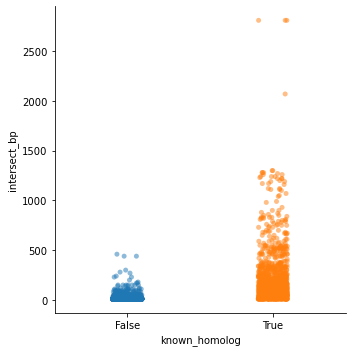

In [31]:
sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_bp', alpha=0.5)


In [75]:
mouse_gather_results.sort_values('intersect_bp', ascending=False)

,query_name,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,md5,f_match_orig,moltype,ksize,mouse_gene_symbol,human_gene_symbol,pair,known_homolog,intersect_kmer
0,ENSMUSP00000158051.2pep chromosome:GRCm39:17:3...,2810.0,0.582988,0.623060,0.582988,0.582988,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000333363.7pep chromosome:GRCh38:6:38715...,3b9a61241c99383f3782bc308cd01c14,0.623060,hp,72,Dnah8,DNAH8,Dnah8---DNAH8,True,281.0
0,ENSMUSP00000157469.2pep chromosome:GRCm39:17:3...,2810.0,0.582988,0.623060,0.582988,0.582988,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000333363.7pep chromosome:GRCh38:6:38715...,3b9a61241c99383f3782bc308cd01c14,0.623060,hp,72,Dnah8,DNAH8,Dnah8---DNAH8,True,281.0
0,ENSMUSP00000127878.2pep chromosome:GRCm39:17:3...,2810.0,0.582988,0.623060,0.582988,0.582988,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000333363.7pep chromosome:GRCh38:6:38715...,3b9a61241c99383f3782bc308cd01c14,0.623060,hp,72,Dnah8,DNAH8,Dnah8---DNAH8,True,281.0
0,ENSMUSP00000038150.9pep chromosome:GRCm39:17:2...,2070.0,0.802326,0.824701,0.802326,0.802326,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000363435.4pep chromosome:GRCh38:6:33620...,1cde52e700599a850d1977ba5397dcd2,0.824701,hp,72,Itpr3,ITPR3,Itpr3---ITPR3,True,207.0
0,ENSMUSP00000122082.3pep chromosome:GRCm39:17:3...,1300.0,0.726257,0.730337,0.726257,0.726257,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000339915.2pep chromosome:GRCh38:6:33162...,187c655510eb683a17ca86ad4026e79c,0.730337,hp,72,Col11a2,COL11A2,Col11a2---COL11A2,True,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,ENSMUSP00000024833.6pep chromosome:GRCm39:17:3...,10.0,0.021277,0.006897,0.021277,0.021277,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000357190.3pep chromosome:GRCh38:6:12797...,0b64f7c8cb724f1c0bf806d2d646eb1d,0.006897,hp,72,Tmprss3,PTPRK,Tmprss3---PTPRK,False,1.0
1,ENSMUSP00000024833.6pep chromosome:GRCm39:17:3...,10.0,0.021277,0.008547,0.021277,0.021277,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000321334.6pep chromosome:GRCh38:6:16053...,e362aff4133c81b7362ae567f3284da0,0.008547,hp,72,Tmprss3,LPA,Tmprss3---LPA,False,1.0
0,ENSMUSP00000024833.6pep chromosome:GRCm39:17:3...,10.0,0.021277,0.014925,0.021277,0.021277,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000229729.6pep chromosome:GRCh38:6:31863...,6d9199c6b69b1cf1c16a0f1d94952ba0,0.014925,hp,72,Tmprss3,SLC44A4,Tmprss3---SLC44A4,False,1.0
1,ENSMUSP00000024829.7pep chromosome:GRCm39:17:3...,10.0,0.013889,0.006024,0.013889,0.013889,0.0,0.0,0.0,/mnt/data_sm/olga/botryllus/pipeline-results/k...,ENSP00000244533.3pep chromosome:GRCh38:6:43431...,c83f4f46964c87bb2b042567ddcebae4,0.006024,hp,72,Abcg1,ABCC10,Abcg1---ABCC10,False,1.0


In [32]:
mouse_gather_results['intersect_kmer'] = mouse_gather_results['intersect_bp']/10

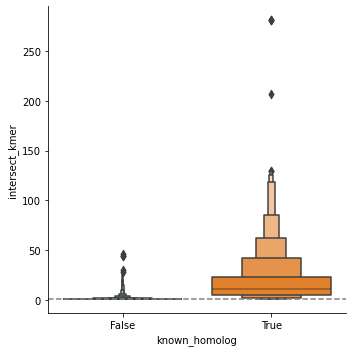

In [33]:
g = sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_kmer', kind='boxen')
# g.set(yscale='log')
for ax in g.axes.flatten():
    ax.axhline(1, linestyle='--', color='grey')


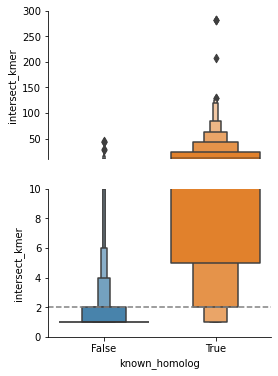

In [34]:
fig, axes = plt.subplots(nrows=2, figsize=(4,6))
for i, ax in enumerate(axes):
    sns.boxenplot(data=mouse_gather_results, x='known_homolog', y='intersect_kmer', ax=ax)
    if i == 1:
        ax.axhline(2, linestyle='--', color='grey')
        ax.set(ylim=(0, 10))
        sns.despine(ax=ax)
    else:
        ax.set(ylim=(10, 300), xlabel=None, xticks=[])
        sns.despine(ax=ax, bottom=True)


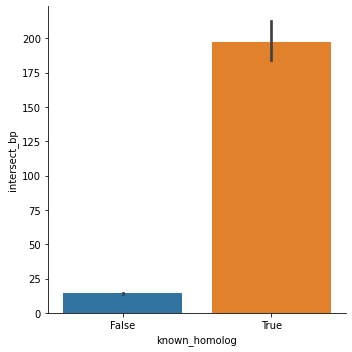

In [35]:
g = sns.catplot(data=mouse_gather_results, x='known_homolog', y='intersect_bp', kind='bar')
# g.map(sns.stripplot, 'known_homolog', 'intersect_bp', hue='known_homolog')

In [ ]:
mouse_gather_results.shape

# Compute significance of ovelrap

In [44]:
human_mouse_pairs_in_gather_results.shape

(1320, 3)

In [45]:
mouse_gather_results.query('intersect_bp > 10').known_homolog.value_counts()

True     1215
False     799
Name: known_homolog, dtype: int64

## ROC Curve

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support

In [51]:
fpr, tpr, thresholds = roc_curve(
    mouse_gather_results["known_homolog"], mouse_gather_results["intersect_bp"]
)

In [64]:
auc_score = roc_auc_score(
    mouse_gather_results["known_homolog"], mouse_gather_results["intersect_bp"]
)
auc_score

0.9374098096957276

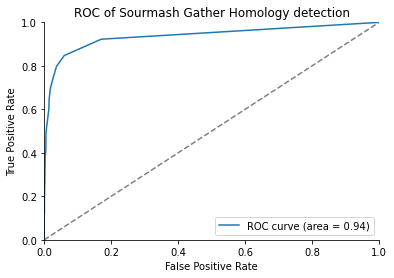

In [71]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label=f"ROC curve (area = {auc_score:0.2f})",)
ax.plot([0, 1], [0, 1], "--", color="grey")
ax.legend()
plt.title("ROC of Sourmash Gather Homology detection")
ax.set(ylim=(0, 1), xlim=(0, 1), xlabel="False Positive Rate", ylabel="True Positive Rate")
sns.despine()

## Set threshold to `intersect_bp > 10` --> What's the precision recall?

In [74]:
y_true = mouse_gather_results["known_homolog"]
y_pred = mouse_gather_results["intersect_bp"] > 10

precision, recall, fscore, support = precision_recall_fscore_support(
    y_true, y_pred, average="binary"
)
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"fscore: {fscore}")
print(f"support: {support}")

precision: 0.6032770605759682
recall: 0.9225512528473804
fscore: 0.7295106574602221
support: None
